In [1]:
%matplotlib inline
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

from datetime import datetime

from multiprocessing import Pool
import glob

import tempmatch as tm

In [2]:
datafiles2019 = glob.glob('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.*')
datafiles2020 = glob.glob('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2020.*')
datafiles = datafiles2019 + datafiles2020


In [3]:
# tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138' , '2019-05-18T12:06:05.055Z', '2019-05-18T12:06:05.3Z').plot()

In [4]:
templates = [
#     tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138', '2019-05-18T11:57:41.507000Z', '2019-05-18T11:57:41.782000Z')    
#     ,tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.274', '2019-10-01T12:32:11.92Z', '2019-10-01T12:32:12.13Z')
#     ,tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138' , '2019-05-18T12:06:05.1Z', '2019-05-18T12:06:05.3Z')
#     ,tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138' , '2019-05-18T12:06:22.65Z', '2019-05-18T12:06:22.939Z')
#     ,
#     tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138' , '2019-05-18T15:05:47.7Z', '2019-05-18T15:05:47.844Z')
#     ,tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138' , '2019-05-18T14:58:53.628Z', '2019-05-18T14:58:53.781Z')
#     ,
    tm.make_template('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138' , '2019-05-18T14:36:16.178Z', '2019-05-18T14:36:16.304Z')
]

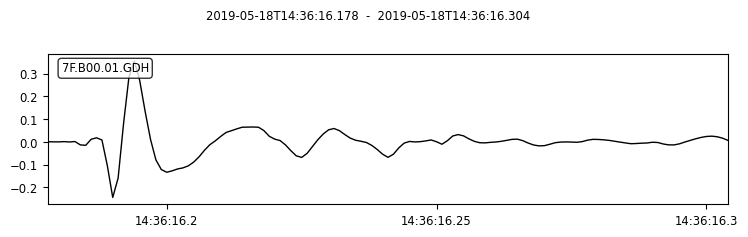

In [5]:
# _ = templates[0].plot()
# _ = templates[1].plot()
# _ = templates[2].plot()
for t in templates:
    t.plot()

In [6]:
# fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ax.plot(templates[0][0].data[5:])
# ax.plot(templates[3][0].data)

# cc = np.correlate(templates[0][0].data[5:], templates[3][0].data, 'same')
# ax2.plot(cc)

# ax2.set_xlabel('Time (ms)')
# ax2.set_ylabel('cross correlation')
# ax.legend(['template0', 'template3'], fontsize=15)

# fig.tight_layout()
# # np.corrcoef(templates[0][0].data, templates[3][0].data)

In [7]:
day138 = tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138')

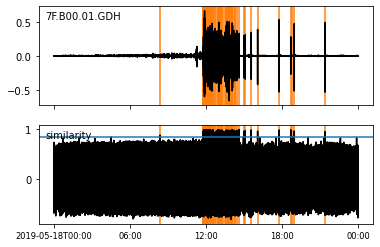

In [15]:
height = 0.8
height = 0.85
# distance = 3
distance = 1.1

dlen = []

for t in np.arange(0, len(templates), 1):
    detections, sims = correlation_detector(stream=day138
    #                                        ,templates=templates[::-1]
                                           ,templates=templates[0:t+1]
                                           ,heights=height
                                           ,distance=distance
                                           ,plot=day138)
    dlen.append(len(detections))

[Text(0, 0, '1')]

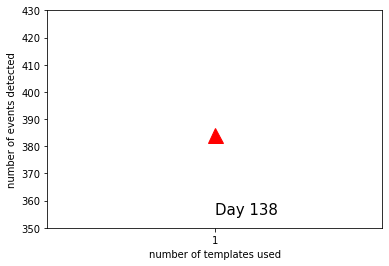

In [16]:
x = np.arange(0, len(dlen), 1).astype(int)
fig, ax = plt.subplots()
ax.plot(x, dlen, marker='^', markersize=15, color='red')
ax.set_ylim(350, 430)
ax.set_ylabel('number of events detected')
ax.set_xlabel('number of templates used')
ax.text(x=0, y=355, s='Day 138', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(x+1)

In [17]:
# len(detections)

In [20]:
df = pd.DataFrame(detections)
df['ones'] = 1
df['cumevents'] = df.ones.cumsum()
df['time'] = pd.to_datetime(df['time'].astype(str))
df.set_index('time', inplace=True)
df.template_id.unique()

array([0])

In [21]:
df.shape

(384, 4)

<AxesSubplot:xlabel='time'>

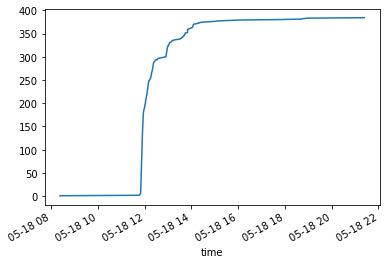

In [22]:
df.cumevents.plot()

In [26]:
df.tail()

,similarity,template_id,ones,cumevents
time,,,,
2019-05-18 17:46:28.279000+00:00,0.988710,0,1,380
2019-05-18 18:41:01.542000+00:00,0.992012,0,1,381
2019-05-18 18:47:23.169000+00:00,0.853935,0,1,382
2019-05-18 18:57:46.188000+00:00,0.967217,0,1,383
2019-05-18 21:23:40.333000+00:00,0.955148,0,1,384


<AxesSubplot:xlabel='time'>

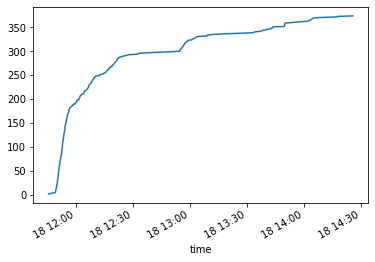

In [29]:
df[1:-10].cumevents.plot()

<AxesSubplot:xlabel='template_id'>

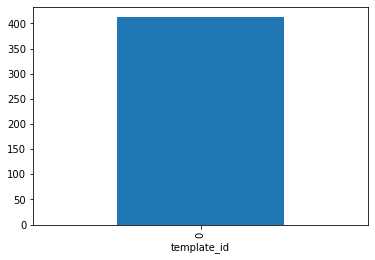

In [14]:
df.groupby('template_id').sum().ones.plot.bar()

In [ ]:
print('distance between event and first reflection')
UTC('2019-05-18T12:06:05.104Z') - UTC('2019-05-18T12:06:05.628Z')

In [ ]:
[1, 2, 3][::-1]

In [ ]:
templates[0][0]

In [ ]:
UTC('2019-05-18T11:57:41.782000Z') - UTC('2019-05-18T11:57:41.507000Z')

In [ ]:
detections[0]

In [ ]:
window = 0.15

df_traces = pd.DataFrame()

for i, d in enumerate(detections):
    data = day138.copy()
    tr = data.trim(starttime=UTC(d['time']), endtime=UTC(d['time']+window))
    temp_df = pd.DataFrame(
        {
            'times':tr[0].times()
            , 'data':tr[0].data
            , 'id':np.zeros_like(tr[0].data)+i
        })
    df_traces = pd.concat([df_traces, temp_df])

In [ ]:
df_traces.describe()

In [ ]:
df_traces.head()

In [ ]:
def corrmax(tr1, tr2):
    cc = np.correlate(tr1, tr2, 'same')
    return np.max(cc)

corrmax(df_traces[df_traces.id==0].data, df_traces[df_traces.id==2].data)

In [ ]:
ids = df_traces.id.unique()

cc_df = pd.DataFrame()

for id1 in ids:
    for id2 in ids:
        cc = corrmax(df_traces[df_traces.id==id1].data, df_traces[df_traces.id==id2].data)
        cccoef = np.corrcoef(df_traces[df_traces.id==id1].data, df_traces[df_traces.id==id2].data)[0,1]
        temp_df = pd.DataFrame({'id1':[id1], 'id2':[id2], 'cc':[cc], 'cccoef':[cccoef]})
        cc_df = pd.concat([cc_df, temp_df])

In [ ]:
cc_df.head()

In [ ]:
cc_df.describe()

In [ ]:
cc_df[cc_df.cc>1]

In [ ]:
detections[400]

In [ ]:
day138

In [ ]:
data = day138.copy()
d406 = detections[406]

tr406 = data.trim(starttime=UTC(d406['time']), endtime=UTC(d406['time']+window))

data = day138.copy()
d400 = detections[400]
tr400 = data.trim(starttime=UTC(d400['time']), endtime=UTC(d400['time']+window))

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(tr406[0].data)
ax.plot(tr400[0].data)
ax.plot(np.correlate(tr406[0].data, tr400[0].data, 'same')+1)

ax.legend(['detection 406', 'detection 400', 'numpy.correlate output'])

np.corrcoef(tr406[0].data, tr400[0].data)[0,1]

In [ ]:
z = cc_df.pivot_table(index='id1', columns='id2', values='cc').values
fig, ax = plt.subplots(figsize=(15, 15))

cbar = ax.imshow(z, cmap='nipy_spectral_r')
fig.colorbar(cbar)

In [ ]:
z = cc_df.pivot_table(index='id1', columns='id2', values='cccoef').values
fig, ax = plt.subplots(figsize=(15, 15))

cbar = ax.imshow(z, cmap='PRGn', vmin=-0.8, vmax=0.8)
fig.colorbar(cbar, label='Correlation Coefficient')

In [ ]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
cc_df.cccoef.hist(bins=np.linspace(-1, 1, 100), grid=False, color='dodgerblue', ax=ax)
cc_df.cccoef.hist(bins=np.linspace(-1, 1, 100), grid=False, color='darkorange', ax=ax2, cumulative=True, density=True)
ax2.set_xlabel('correlation coefficient value', fontsize=15)
ax2.legend(['cumulative distribution'], fontsize=15)
ax.legend(['distribution'], fontsize=15)
fig.tight_layout()

In [ ]:
def gethist(data):
    h, e = np.histogram(data, bins=np.linspace(-1, 1, 100))
    h = h/h.sum()
    return h, e

h, e = gethist(cc_df.cccoef)
fig, (ax, ax2) = plt.subplots(2, 1)
ax.plot(e[:-1], h)
ax2.plot(e[:-1], h.cumsum())

In [ ]:
df_traces[df_traces.id==1].plot(x='times', y='data')

In [ ]:
df_traces[df_traces.id==150].plot(x='times', y='data')